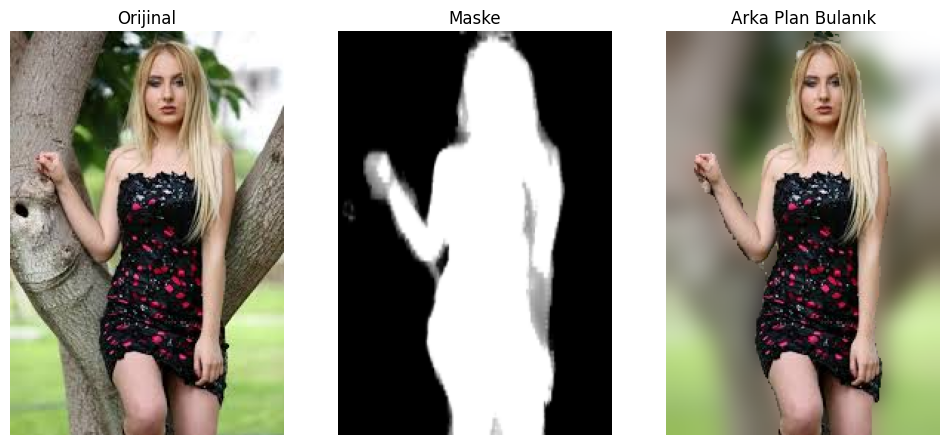

In [4]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# MediaPipe Selfie Segmentation
mp_selfie_segmentation = mp.solutions.selfie_segmentation

# Görseli oku
image_path = "ornek.jpg"  # kendi görselinin yolunu yaz
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

with mp_selfie_segmentation.SelfieSegmentation(model_selection=1) as selfie_segmentation:
    results = selfie_segmentation.process(image_rgb)
    mask = results.segmentation_mask
    condition = mask > 0.5  # eşik değeri

    # Arka planı bulanıklaştır
    blurred_bg = cv2.GaussianBlur(image, (55, 55), 0)

    # Kişiyi orijinal bırak, arka planı bulanık yap
    output_image = np.where(condition[..., None], image, blurred_bg)

# Sonuçları göster
plt.figure(figsize=(12,6))

plt.subplot(1, 3, 1)
plt.title("Orijinal")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Maske")
plt.imshow(mask, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Arka Plan Bulanık")
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()


In [5]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

def segment_and_blur(image_path, blur_strength=55, show=True):
    """
    Verilen resimde kişiyi ayırır ve arka planı bulanık yapar.
    
    Args:
        image_path (str): Görselin yolu
        blur_strength (int): Gaussian Blur kernel boyutu (tek sayı olmalı, varsayılan 55)
        show (bool): True ise matplotlib ile sonucu gösterir
    
    Returns:
        np.ndarray: Arka planı bulanıklaştırılmış resim (BGR formatında)
    """
    # MediaPipe Selfie Segmentation
    mp_selfie_segmentation = mp.solutions.selfie_segmentation

    # Görseli oku
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    with mp_selfie_segmentation.SelfieSegmentation(model_selection=1) as selfie_segmentation:
        results = selfie_segmentation.process(image_rgb)
        mask = results.segmentation_mask
        condition = mask > 0.5

        # Arka planı bulanıklaştır
        blurred_bg = cv2.GaussianBlur(image, (blur_strength, blur_strength), 0)

        # Kişi net, arka plan bulanık
        output_image = np.where(condition[..., None], image, blurred_bg)

    # İsteğe bağlı görselleştirme
    if show:
        plt.figure(figsize=(12,6))
        plt.subplot(1, 3, 1)
        plt.title("Orijinal")
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.title("Maske")
        plt.imshow(mask, cmap="gray")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.title("Arka Plan Bulanık")
        plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()

    return output_image


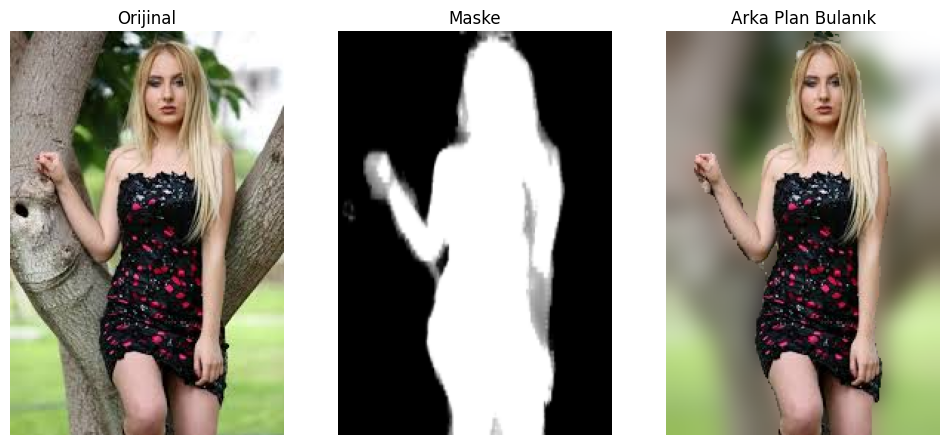

In [ ]:
# Örnek kullanım
output = segment_and_blur("ornek.jpg", blur_strength=55)

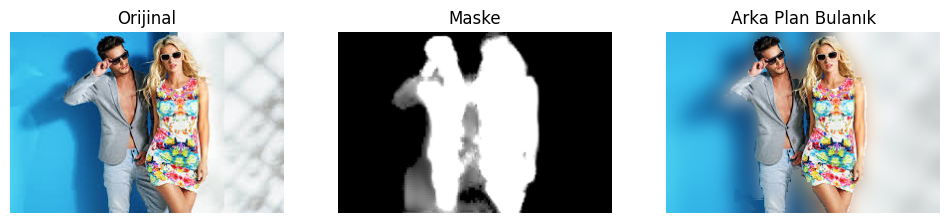

In [8]:
# Örnek kullanım
output = segment_and_blur("2kisiornek.jpg", blur_strength=55)

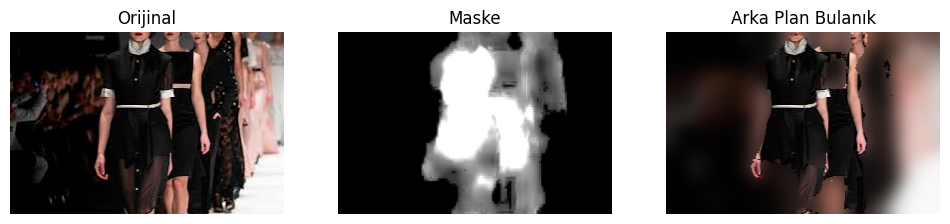

In [ ]:
# Örnek kullanım
output = segment_and_blur("bircokkisiornek.jpg", blur_strength=55)